# 13.4. USDA Food Database

Bộ Nông nghiệp Hoa Kỳ (USDA) cung cấp một cơ sở dữ liệu về thông tin dinh dưỡng của thực phẩm. Lập trình viên Ashley Williams đã tạo ra một phiên bản của cơ sở dữ liệu này dưới định dạng JSON.

Mỗi thực phẩm có một số thuộc tính nhận dạng cùng với hai danh sách về chất dinh dưỡng và kích thước khẩu phần. Dữ liệu ở dạng này không dễ phân tích, vì vậy chúng ta cần xử lý lại để có dạng phù hợp hơn cho việc phân tích.
Bạn có thể tải file này vào Python bằng bất kỳ thư viện JSON nào bạn thích. Ở đây, tôi sẽ sử dụng mô-đun json tích hợp sẵn của Python:

In [9]:
# import thư viện
import json
import pandas as pd

In [ ]:
# đọc dữ liệu từ file JSON
db = json.load(open("datasets/usda_food/database.json"))

In [4]:
# số lượng bản ghi trong cơ sở dữ liệu
len(db)

6636

Mỗi phần tử trong db là một từ điển chứa toàn bộ dữ liệu của một loại thực phẩm. Trường "nutrients" là một danh sách các từ điển, mỗi từ điển tương ứng với một chất dinh dưỡng:

In [5]:
# Các trường dữ liệu trong bản ghi đầu tiên
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [6]:
# Thông tin về thực phẩm đầu tiên trong cơ sở dữ liệu
db[0]["nutrients"][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [10]:
# Tạo DataFrame từ danh sách các chất dinh dưỡng của thực phẩm đầu tiên
nutrients = pd.DataFrame(db[0]["nutrients"])

In [11]:
# Hiển thị 7 dòng đầu tiên của DataFrame nutrients
nutrients.head(7)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


Khi chuyển một danh sách các từ điển thành DataFrame, chúng ta có thể chỉ định danh sách các trường cần trích xuất. Ở đây, chúng ta sẽ lấy tên thực phẩm, nhóm, ID và nhà sản xuất:

In [12]:
# Các trường thông tin về thực phẩm
info_keys = ["description", "group", "id", "manufacturer"]

In [13]:
# Tạo DataFrame chứa thông tin về tất cả các thực phẩm
info = pd.DataFrame(db, columns=info_keys)

In [14]:
# Hiển thị 5 dòng đầu tiên của DataFrame info
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [15]:
# Thông tin tổng quan về DataFrame info
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


Từ kết quả của info.info(), chúng ta có thể thấy rằng có dữ liệu bị thiếu trong cột manufacturer.

Xem phân bố các nhóm thực phẩm bằng phương thức value_count

In [16]:
# Xem phân bố các nhóm thực phẩm bằng phương thức value_counts
pd.value_counts(info["group"])[:10] 

C:\Users\THANHNGAN\AppData\Local\Temp\ipykernel_17060\976223207.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(info["group"])[:10]


group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: count, dtype: int64

Bây giờ, để phân tích toàn bộ dữ liệu về chất dinh dưỡng, cách dễ nhất là tổng hợp các chất dinh dưỡng của mỗi thực phẩm vào một bảng lớn duy nhất. Để làm được điều này, chúng ta cần thực hiện một số bước. Đầu tiên, tôi sẽ chuyển mỗi danh sách chất dinh dưỡng của thực phẩm thành một DataFrame, thêm một cột chứa id của thực phẩm, rồi thêm DataFrame đó vào một danh sách. Sau đó, các DataFrame này có thể được nối lại với nhau bằng hàm concat. Hãy chạy đoạn mã sau trong một ô Jupyter:

In [17]:
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)

Bảng nutrients sẽ có dạng như sau:

In [18]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


 Nhận thấy rằng có các dòng trùng lặp trong DataFrame này, vì vậy sẽ dễ dàng hơn nếu loại bỏ chúng đi:

In [19]:
nutrients.duplicated().sum() # number of duplicates

np.int64(14179)

In [20]:
nutrients = nutrients.drop_duplicates()

Vì "group" và "description" đều xuất hiện trong cả hai DataFrame, chúng ta có thể đổi tên các cột này cho dễ hiểu hơn:

In [21]:
col_mapping = {"description" : "food", "group" : "fgroup"}

In [22]:
info = info.rename(columns=col_mapping, copy=False)

In [23]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [24]:
col_mapping = {"description" : "nutrient", "group" : "nutgroup"}

In [25]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [26]:
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


Sau khi hoàn thành tất cả các bước trên, chúng ta đã sẵn sàng để ghép bảng info với bảng nutrients

In [27]:
ndata = pd.merge(nutrients, info, on="id")

In [28]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


In [29]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

Vẽ biểu đồ giá trị trung vị theo nhóm thực phẩm và loại chất dinh dưỡng

In [30]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)

<Axes: ylabel='fgroup'>

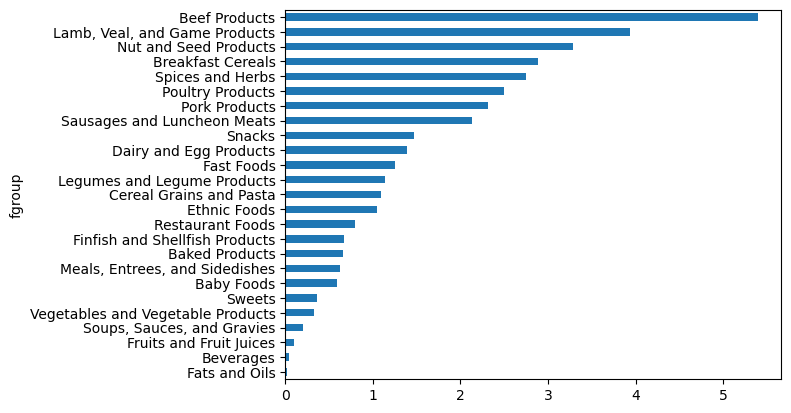

In [ ]:
result["Zinc, Zn"].sort_values().plot(kind="barh") 

Bằng cách sử dụng các phương thức idxmax hoặc argmax của Series, có thể tìm ra thực phẩm nào có hàm lượng cao nhất cho mỗi chất dinh dưỡng.

In [ ]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])
def get_maximum(x):
    return x.loc[x.value.idxmax()]
max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]
# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]

C:\Users\THANHNGAN\AppData\Local\Temp\ipykernel_17060\3006579210.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]


DataFrame kết quả hơi lớn để hiển thị trong sách; dưới đây chỉ là nhóm chất dinh dưỡng "Amino Acids"

In [ ]:
# Hiển thị thực phẩm có hàm lượng cao nhất trong nhóm chất dinh dưỡng "Amino Acids"
max_foods.loc["Amino Acids"]["food"]

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 